### Identifying Different Groups of Customers

This analysis uses the aisles information to differentiate different groups of customers. However, there are too many aisles to run an effective cluster analysis initially. 

1) Perform a Principal Components Analysis to reduce aisles dimensionality

2) Cluster the customers using principle components and historical reorder rates





In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in saved dataset - using Dataset developed during EDA, but only clustering on user order history.
orders_total = pd.read_csv("Orders Total.csv")[:-1]
orders_total.drop(orders_total.columns[[0]], inplace = True, axis = 1)

orders_train = orders_total[orders_total['eval_set'] == 'train']
orders_total = orders_total[orders_total['eval_set'] == 'prior']

orders_total.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [3]:
orders_total['aisle'].value_counts()

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
cereal                            377586
soft drinks                       357537
fresh dips tapenades              355685
soup broth bouillon               346464
juice nectars   

In [4]:
#Unique by User with dummy for each aisle
aisle_products = pd.crosstab(orders_total['user_id'], orders_total['aisle'])
aisle_products.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### What is a Principal Components Analysis 

Dimensionality Reduction Technique.  For example, this dataset contains 134 aisles, however, PCA will account 
for as much variation as possible between the different types of aisles through n_components (where n is the number
of aisles I want to include). The purpose is to simplify the dataset allowing for easier customer segmentation. 

The below essentially comes up with a group of principal components. The first group is the combination of 
x-variables that has the maximum variance.  The second is the same but only with the remaining variation. 
The constraint being that the correlation between the current PC and all beforehand is that their correlations
are zero

Within each principal component group, a user will receive a score which demonstrates how they move according to 
changes in the PC group. Essentially, if two users each have a high positive PC score in a group then then if one
moves in a positive direction, it is very likely that the other will too. The same goes for negative values.

I have read that one way to determine the number of principal components to use, is the number that explains 
approximately 85% of the variance.  In this case, this is 20.  While this method is not very scientific or exact
it will satisfy this analysis.

Text(0,0.5,'Explain Cumulative Variance')

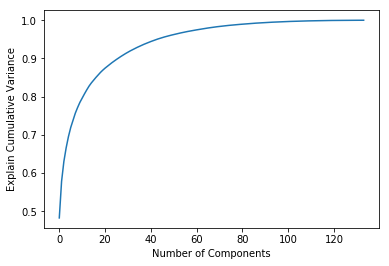

In [7]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(aisle_products)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explain Cumulative Variance")

It seems like 20 might be the optimal number of principal components

In [8]:
#Define Principal Components Function

def run_pca(n_components):
    pca = PCA(n_components = n_components)
    pca.fit(aisle_products)
    pcaTrans = pca.transform(aisle_products)
    
    pcaDF = pd.DataFrame(pcaTrans)
    
    #increment dataframe index by 1 so it lines up with user IDs
    pcaDF.index = range(1, len(pcaDF)+1)
    
    print(pcaDF.head())
    
    return pcaDF
    

In [9]:
pcaDF = run_pca(n_components = 20)

          0          1          2          3         4         5         6   \
1 -24.215659   2.429427  -2.466367  -0.145657  0.268971 -1.432802  2.140624   
2   6.463208  36.751117   8.382549  15.097547 -6.920942 -0.978413  6.011205   
3  -7.990302   2.404383 -11.030066   0.672228 -0.442371 -2.823362 -6.284147   
4 -27.991129  -0.755823  -1.921732   2.091886 -0.288226  0.926179  0.827154   
5 -19.896394  -2.637225   0.533228   3.679229  0.612823 -1.624028 -3.935761   

         7         8         9         10        11        12        13  \
1 -2.738689 -2.716635 -1.743980 -1.122440  0.665755 -1.635644  2.836510   
2  3.788385 -8.179583 -9.040880 -5.611578 -1.120844  3.012783 -4.726964   
3  6.512533 -2.147595 -1.586052  8.283654 -2.667661 -4.505314  1.212318   
4  0.614809  0.037998 -0.891022 -0.372621 -0.984607  1.227714 -1.095954   
5  2.004772  1.002442  3.085738 -0.551302  0.285944  0.417195 -2.643390   

         14        15        16        17        18        19  
1 -5.95880

In [10]:
#Define Function that plots various components


def plot_components(x_value, y_value):
    plt.figure(figsize = (12,4))
    plt.scatter(pcaDF[x_value], pcaDF[y_value])
    plt.xlabel("Component " + str(x_value))
    plt.ylabel("Component " + str(y_value))
    plt.show
    

As I am still learning, I wanted to plot various components against one another.  

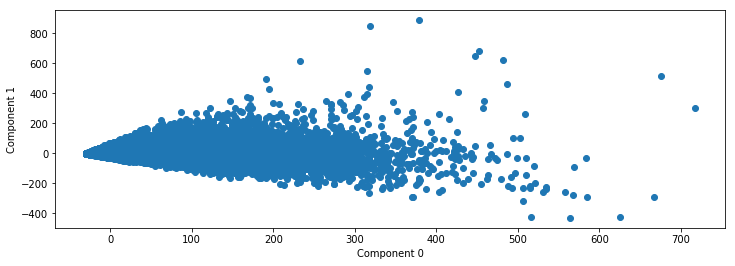

In [11]:
plot_components(0,1)

Now, not only do I want to cluster customers based on their order habits. I want to group them based on their reorder rate. I will attach the average reorder rate for each user then cluster. 


In [12]:
user_reorder_rates = orders_total.groupby('user_id')['reordered'].mean().reset_index()
user_reorder_rates.head()

,user_id,reordered
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [13]:
aisle_products_reorder = pd.merge(aisle_products, user_reorder_rates, left_index = True, 
                                  right_on = 'user_id')
display(aisle_products_reorder.head())

pcaDF = pd.merge(pcaDF, user_reorder_rates, left_index = True, right_on = 'user_id').drop('user_id', axis = 1)
display(pcaDF.head())

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,user_id,reordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.694915
1,0,3,0,0,0,0,2,0,0,0,...,1,0,0,0,0,2,0,42,2,0.476923
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,3,0.625000
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,4,0.055556
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,0.378378


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,reordered
0,-24.215659,2.429427,-2.466367,-0.145657,0.268971,-1.432802,2.140624,-2.738689,-2.716635,-1.743980,...,0.665755,-1.635644,2.836510,-5.958809,7.847012,-4.653323,-3.186424,-4.632657,0.705891,0.694915
1,6.463208,36.751117,8.382549,15.097547,-6.920942,-0.978413,6.011205,3.788385,-8.179583,-9.040880,...,-1.120844,3.012783,-4.726964,9.105301,0.254193,1.285079,-0.620915,-0.653711,0.518722,0.476923
2,-7.990302,2.404383,-11.030066,0.672228,-0.442371,-2.823362,-6.284147,6.512533,-2.147595,-1.586052,...,-2.667661,-4.505314,1.212318,-0.693836,2.073562,-2.045817,5.432044,-3.559316,4.224959,0.625000
3,-27.991129,-0.755823,-1.921732,2.091886,-0.288226,0.926179,0.827154,0.614809,0.037998,-0.891022,...,-0.984607,1.227714,-1.095954,1.872404,0.722050,0.693354,-0.250197,-0.056017,-0.209608,0.055556
4,-19.896394,-2.637225,0.533228,3.679229,0.612823,-1.624028,-3.935761,2.004772,1.002442,3.085738,...,0.285944,0.417195,-2.643390,-0.062534,-0.165207,-0.476323,1.652675,-0.397816,0.080575,0.378378


### K Means Clustering

Now that I have reduced the dataset to much fewer variables.  The goal of this will be to group users based on ordering habits (e.g., products that they order and their historical reorder rate).  This would allow a company to not only target customers more likely to reorder, but understand which products they may be likely to purchase.  

The competition's task to identify products that a customer may reorder may help provide better customer support for items that a consumer has already purchased.  However, this will provide insight for how to provide bettter customer support for items that a consumer may not have purchased yet.  

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

First, I need to determine the number of clusters I want to use.  I will use the simple 'elbow' approach for this. 

Text(0.5,1,'Elbow Plot to Determine Optimal Number of Clusters')

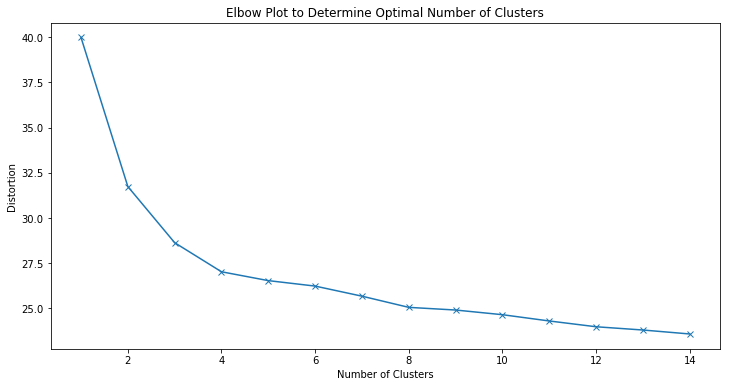

In [15]:
dist = []

possible_k = range(1,15)
for k in possible_k:
    model = KMeans(n_clusters = k, random_state = 0).fit(pcaDF)
    dist.append(sum(np.min(cdist(pcaDF, model.cluster_centers_, 'euclidean'), axis=1)) / pcaDF.shape[0])
    
plt.figure(figsize = (12,6))
plt.plot(possible_k, dist, 'x-')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Elbow Plot to Determine Optimal Number of Clusters")

Text(0.5,1,'Alternative Elbow Plot')

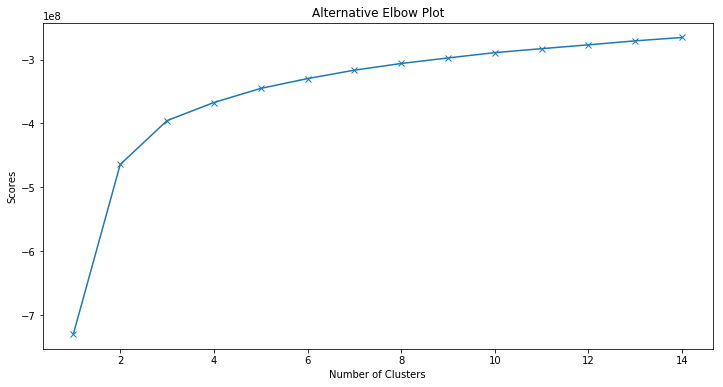

In [16]:
#An alternative elbow method
scores = []

for k in possible_k:
    model = KMeans(n_clusters = k, random_state = 0).fit(pcaDF)
    scores.append(model.score(pcaDF))

plt.figure(figsize = (12, 6))
plt.plot(possible_k, scores, 'x-')
plt.xlabel("Number of Clusters")
plt.ylabel("Scores")
plt.title("Alternative Elbow Plot")

4 Seems to be the correct number of clusters here

In [17]:
clusts = KMeans(n_clusters = 4, random_state = 0).fit(pcaDF)

clusters = clusts.predict(pcaDF)
clusters[0:50]

array([3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2], dtype=int32)

In [18]:
#Merge clusters onto aisle_products_reordered and orders_total
aisle_products_reorder['cluster'] = clusters
display(aisle_products_reorder.head())

orders_total = pd.merge(orders_total, aisle_products_reorder[['cluster', 'user_id']], on = 'user_id')
display(orders_total.head())

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,user_id,reordered,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.694915,3
1,0,3,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,42,2,0.476923,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,3,0.625000,3
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,4,0.055556,3
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,5,0.378378,3


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cluster
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,3
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,3
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,3
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,3
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,3


In [19]:
#Now to look at who/what belongs in each cluster

display(aisle_products_reorder.groupby('cluster')['reordered'].mean())
display(orders_total.groupby('cluster')['reordered'].mean())

cluster
0    0.574134
1    0.774380
2    0.702738
3    0.361160
Name: reordered, dtype: float64

cluster
0    0.597885
1    0.781020
2    0.713028
3    0.424230
Name: reordered, dtype: float64

We see that those within cluster 1 and 2 have high reorder rates. Cluster 0 has a very low reorder rate. Finally, Cluster 3 is a sort of in the middle one.  Same in the orders total - however this is slightly different due to weights being applied by number of products

Let's start exploring the different products found in each cluster

In [20]:
#What are the top items purchased by each cluster?

for clust in range(0,4):
    print("Top 15 Producers in Cluster " + str(clust))
    display(orders_total[orders_total['cluster'] == clust].aisle.value_counts().head(15))

Top 15 Producers in Cluster 0


fresh fruits                     1184966
fresh vegetables                 1165389
packaged vegetables fruits        593809
yogurt                            477294
packaged cheese                   323316
milk                              284736
water seltzer sparkling water     272230
chips pretzels                    237896
soy lactosefree                   216955
refrigerated                      191286
bread                             189517
frozen produce                    179628
ice cream ice                     164231
eggs                              153733
energy granola bars               151967
Name: aisle, dtype: int64

Top 15 Producers in Cluster 1


fresh fruits                     560152
fresh vegetables                 555661
packaged vegetables fruits       240425
yogurt                           182827
packaged cheese                  110937
milk                             106730
soy lactosefree                   70326
bread                             65077
baby food formula                 64924
chips pretzels                    61151
fresh herbs                       59535
frozen produce                    57973
water seltzer sparkling water     56984
refrigerated                      53840
crackers                          45601
Name: aisle, dtype: int64

Top 15 Producers in Cluster 2


fresh fruits                     1031199
fresh vegetables                  913444
packaged vegetables fruits        464666
yogurt                            405728
packaged cheese                   241702
milk                              230042
water seltzer sparkling water     175253
chips pretzels                    158412
soy lactosefree                   157909
bread                             142146
refrigerated                      136092
frozen produce                    124540
baby food formula                 122734
energy granola bars               120272
eggs                              107210
Name: aisle, dtype: int64

Top 15 Producers in Cluster 3


fresh fruits                     865871
fresh vegetables                 783527
packaged vegetables fruits       466413
yogurt                           386494
water seltzer sparkling water    337066
packaged cheese                  303808
milk                             269507
chips pretzels                   265011
ice cream ice                    205397
soft drinks                      195445
refrigerated                     194663
soy lactosefree                  193063
bread                            188094
frozen meals                     178266
crackers                         160517
Name: aisle, dtype: int64

In [21]:
#Which group is most likely to buy the most of certain items - allows for targeting by item
#For each Cluster calculate the percent of each item from the total of the same items
#Cluster 0 bought the same items, but there were 15 total fruits bought, 6 total snacks, and 8 waters 
    #So, 30%; 50%; 25%
totals = orders_total.aisle.value_counts().reset_index()
totals.columns = ['index', 'total_counts']

for clust in range(0,4):
    print("Number of Items in Cluster " + str(clust) + " as a Percent of Total Items Purchased")
    clust_counts = (orders_total[orders_total['cluster'] == clust].aisle.value_counts().reset_index()
                   .merge(totals, on = 'index'))
    clust_counts['perc'] = clust_counts['aisle']/clust_counts['total_counts']
    
    display(clust_counts.sort_values(by = 'perc', ascending = False)[:15])
    
#Interesting - cluster 0 buys most of the alcohol and toiletries.  
#They may buy a lot of them, but they may not be reordering the same products

#Clusters 1 buys a third of the baby food - suggesting new parents may be more likely to reorder


Number of Items in Cluster 0 as a Percent of Total Items Purchased


,index,aisle,total_counts,perc
133,frozen juice,1734,4853,0.357305
74,meat counter,25255,70887,0.356271
58,packaged poultry,42121,118437,0.355641
117,indian foods,5602,15901,0.352305
88,refrigerated pudding desserts,13117,37691,0.348014
56,tofu meat alternatives,45017,129474,0.347691
73,latino foods,26007,74947,0.347005
63,frozen vegan vegetarian,34329,99369,0.345470
87,frozen breads doughs,13871,40208,0.344981
59,pickled goods olives,38855,112639,0.344952


Number of Items in Cluster 1 as a Percent of Total Items Purchased


,index,aisle,total_counts,perc
89,bulk grains rice dried goods,3279,17205,0.190584
8,baby food formula,64924,382456,0.169755
106,baby accessories,1384,8160,0.169608
1,fresh vegetables,555661,3418021,0.162568
81,seafood counter,4787,29642,0.161494
10,fresh herbs,59535,377741,0.157608
0,fresh fruits,560152,3642188,0.153795
42,grains rice dried goods,20440,144189,0.141758
2,packaged vegetables fruits,240425,1765313,0.136194
95,bulk dried fruits vegetables,2364,17368,0.136112


Number of Items in Cluster 2 as a Percent of Total Items Purchased


,index,aisle,total_counts,perc
12,baby food formula,122734,382456,0.320910
0,fresh fruits,1031199,3642188,0.283126
100,bulk grains rice dried goods,4851,17205,0.281953
3,yogurt,405728,1452343,0.279361
58,granola,27689,101959,0.271570
118,baby accessories,2189,8160,0.268260
16,fresh herbs,101270,377741,0.268094
40,fruit vegetable snacks,46974,175757,0.267267
1,fresh vegetables,913444,3418021,0.267244
88,seafood counter,7877,29642,0.265738


Number of Items in Cluster 3 as a Percent of Total Items Purchased


,index,aisle,total_counts,perc
67,beers coolers,35460,48657,0.728775
117,specialty wines champagnes,7871,11198,0.702893
115,facial care,8421,12169,0.692004
122,eye ear care,6123,8974,0.682304
85,red wines,23933,35181,0.680282
91,spirits,18878,28102,0.671767
88,white wines,19964,30558,0.653315
121,shave needs,6576,10344,0.635731
81,body lotions soap,25490,40768,0.625245
119,first aid,6618,10872,0.608720


In [14]:
#Save Datasets for later use
clusters = orders_total[['user_id', 'cluster']].drop_duplicates()
clusters.head()
clusters.to_csv("User Clusters.csv")